# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [5]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [6]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np 

def unique_labels(x):
    return(len(np.unique(x)))

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:4]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = unique_labels(y_train)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [7]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import pandas as pd
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline



In [8]:
# I took ideas from this website and adapt them:
# https://chrisalbon.com/python/matplotlib_grouped_bar_plot.html

def generate_data_frame():
    """
    This function generates a data frame with the following information:
    First column: unique value of the labels, from 0 to 42
    Second column: the number of times of the unique values of the labels in the training set
    Third column: the number of times of the unique values of the labels in the validation set
    Fourth column: the number of times of the unique values of the labels in the test set
    """
    label = np.unique(y_train, return_counts=True)[0]
    train = np.unique(y_train, return_counts=True)[1]
    valid = np.unique(y_valid, return_counts=True)[1]
    test  = np.unique(y_test, return_counts=True)[1]
    raw_data = {'label': label, 
                'train': train,
                'valid': valid,
                'test' : test }
    df = pd.DataFrame(raw_data, columns = ['label', 'train', 'valid', 'test'])
    return df 
    
data_counts = generate_data_frame()


In [9]:
def generate_bar_graph(df, first, last):
    """
    This function generates a grouped bar graph from the argument provided. 
    The argument must be a pandas data frame which is generated by the above function. 
    """
    
    df = df[first:last]

    # Setting the positions and width for the bars
    pos = list(range(len(df['train']))) 
    width = 0.25 

    # Plotting the bars
    fig, ax = plt.subplots(figsize=(10,5))

    # Create a bar with pre_score data,
    # in position pos,
    plt.bar(pos, 
            #using df['pre_score'] data,
            df['train'], 
            # of width
            width, 
            # with alpha 0.5
            alpha=0.5, 
            # with color
            color='#EE3224') 

    # Create a bar with mid_score data,
    # in position pos + some width buffer,
    plt.bar([p + width for p in pos], 
            #using df['mid_score'] data,
            df['valid'],
            # of width
            width, 
            # with alpha 0.5
            alpha=0.5, 
            # with color
            color='#F78F1E') 

    # Create a bar with post_score data,
    # in position pos + some width buffer,
    plt.bar([p + width*2 for p in pos], 
            #using df['post_score'] data,
            df['test'], 
            # of width
            width, 
            # with alpha 0.5
            alpha=0.5, 
            # with color
            color='#FFC222') 

    # Set the y axis label
    ax.set_ylabel('Frequency')

    # Set the chart's title
    ax.set_title('Labels')

    # Set the position of the x ticks
    ax.set_xticks([p + 1.5 * width for p in pos])

    # Set the labels for the x ticks
    ax.set_xticklabels(df['label'])

    # Setting the x-axis and y-axis limits
    plt.xlim(min(pos)-width, max(pos)+width*4)
    plt.ylim([0, max(df['train'] + df['valid'] + df['test'])] )

    # Adding the legend and showing the plot
    plt.legend(['Train', 'Valid', 'Test'], loc='upper left')
    plt.grid()
    plt.show()    

    

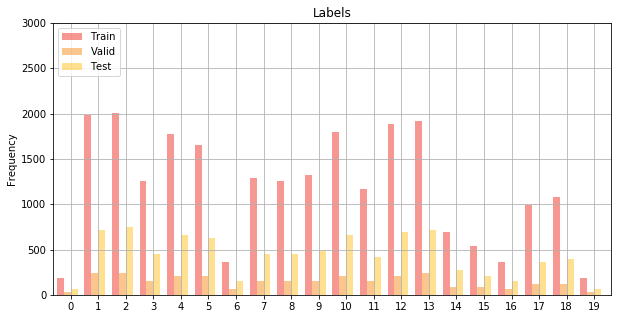

In [10]:
generate_bar_graph(data_counts, 0, 20)

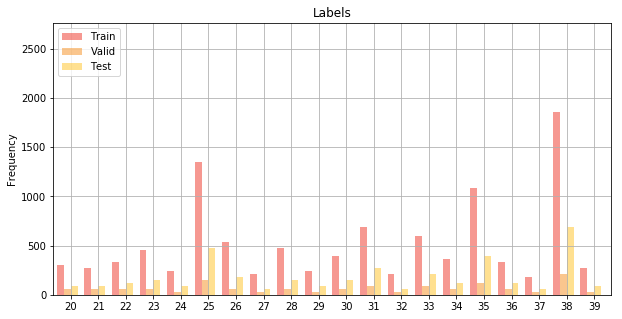

In [11]:
generate_bar_graph(data_counts, 20, 40)

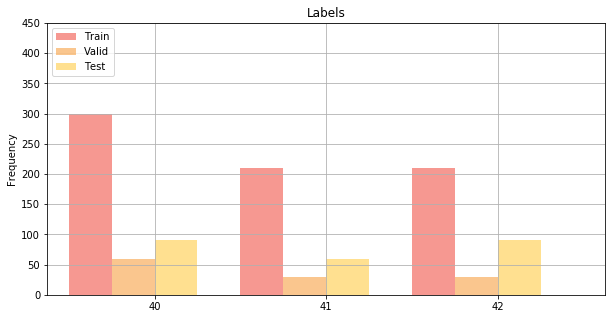

In [12]:
generate_bar_graph(data_counts, 40, 43)

It seems that some labels are more frequent than others in the training set, so that this is an unbalanced classification problem. The frequency table is shown below.

In [13]:
# Frequency table
from scipy.stats import itemfreq
itemfreq(y_train)

array([[   0,  180],
       [   1, 1980],
       [   2, 2010],
       [   3, 1260],
       [   4, 1770],
       [   5, 1650],
       [   6,  360],
       [   7, 1290],
       [   8, 1260],
       [   9, 1320],
       [  10, 1800],
       [  11, 1170],
       [  12, 1890],
       [  13, 1920],
       [  14,  690],
       [  15,  540],
       [  16,  360],
       [  17,  990],
       [  18, 1080],
       [  19,  180],
       [  20,  300],
       [  21,  270],
       [  22,  330],
       [  23,  450],
       [  24,  240],
       [  25, 1350],
       [  26,  540],
       [  27,  210],
       [  28,  480],
       [  29,  240],
       [  30,  390],
       [  31,  690],
       [  32,  210],
       [  33,  599],
       [  34,  360],
       [  35, 1080],
       [  36,  330],
       [  37,  180],
       [  38, 1860],
       [  39,  270],
       [  40,  300],
       [  41,  210],
       [  42,  210]])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [14]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

In [15]:
from sklearn import preprocessing

def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    # TODO: Implement Function
    return (x - 128.0) / 128.0 


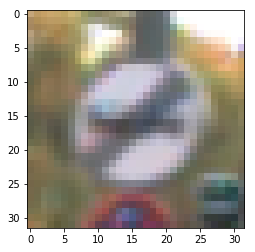

In [16]:
import matplotlib.pyplot as plt # import
image = X_train[100,:,:]
plt.imshow(image) 
plt.show()  # show the image

In [17]:
# This function was taken from: 
# https://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python

def rgb2gray(rgb):   
    """
    This function transform an image to gray scale.
    : rgb: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of the image in grayscale
    """
    
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])    
    

In [18]:
X_train = rgb2gray(X_train)
X_valid = rgb2gray(X_valid)
X_test = rgb2gray(X_test)

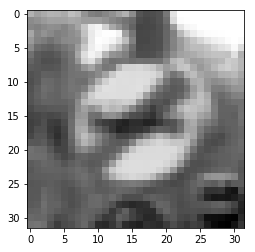

In [19]:
import matplotlib.cm as cm # 
grey = X_train[100,:,:]
plt.imshow(grey, cmap = cm.Greys_r)
plt.show()

In [20]:
X_train = normalize(X_train)
X_valid = normalize(X_valid)
X_test = normalize(X_test)

Shuffle the training data 

In [21]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

Due to the data is unbalanced, I will use oversampling to equilibrate the classes. It is neccesary to do this since that the deep learning model could look at the data and decide that the best thing to do is predict in the labels with more frequency, that is to say, the possible result will be a overspecialized model, resulting in a poor generalization. 

In [18]:
# This function was based on the following url:
# https://stackoverflow.com/questions/23391608/balance-numpy-array-with-over-sampling

def oversampling_image(x, y):
    """
    This function creates a balancead data set from the information of the images and labels.
    : x: Images 
    : y: Labels
    : return: Images and Labels with balanced
    """
    unq, unq_idx = np.unique(y, return_inverse=True)
    #print(unq)
    #print(unq_idx)
    unq_cnt = np.bincount(unq_idx)
    cnt = np.max(unq_cnt)
    out_x = np.empty((cnt*len(unq),) + x.shape[1:], x.dtype)
    out_y = np.empty((cnt*len(unq),), y.dtype)
 
    for j in range(len(unq)):
        indices = np.random.choice(np.where(unq_idx==j)[0], cnt)
        out_x[j*cnt:(j+1)*cnt] = x[indices]
        out_y[j*cnt:(j+1)*cnt] = y[indices]
    
    return out_x, out_y
    

In [19]:
X_train2, y_train2 = oversampling_image(X_train, y_train)

In [22]:
import tensorflow as tf

In [21]:
X_train2 = X_train2[:,:,:,np.newaxis]
X_valid = X_valid[:,:,:,np.newaxis]
X_test = X_test[:,:,:,np.newaxis]

### Model Architecture

In [22]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

As a starting point we are going to use the LeNet Architecture.

In [65]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [24]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

### First model with LeNet Architecture 

In [25]:
rate = 0.001
EPOCHS = 10
BATCH_SIZE = 128

Features and labels 

In [26]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

In [27]:
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [28]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [29]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train2, y_train2)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
            
        training_accuracy = evaluate(X_train, y_train)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print()                    
        
    saver.save(sess, './lenet1')
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.849

EPOCH 2 ...
Training Accuracy = 0.939

EPOCH 3 ...
Training Accuracy = 0.960

EPOCH 4 ...
Training Accuracy = 0.973

EPOCH 5 ...
Training Accuracy = 0.982

EPOCH 6 ...
Training Accuracy = 0.985

EPOCH 7 ...
Training Accuracy = 0.991

EPOCH 8 ...
Training Accuracy = 0.988

EPOCH 9 ...
Training Accuracy = 0.992

EPOCH 10 ...
Training Accuracy = 0.988

Model saved


In [30]:
with tf.Session() as sess:
    saver.restore(sess, "./lenet1")

    valid_accuracy = evaluate(X_valid, y_valid)
    print("Validation Accuracy = {:.3f}".format(valid_accuracy))

Validation Accuracy = 0.895


In [31]:
with tf.Session() as sess:
    saver.restore(sess, "./lenet1")

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.881


### Second model with LeNet Architecture

In [32]:
# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

In [33]:
rate = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [34]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

In [35]:
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [36]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [37]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train2, y_train2)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
            
        training_accuracy = evaluate(X_train, y_train)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print()                    
        
    saver.save(sess, './lenet2')
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.890

EPOCH 2 ...
Training Accuracy = 0.956

EPOCH 3 ...
Training Accuracy = 0.976

EPOCH 4 ...
Training Accuracy = 0.972

EPOCH 5 ...
Training Accuracy = 0.981

EPOCH 6 ...
Training Accuracy = 0.992

EPOCH 7 ...
Training Accuracy = 0.994

EPOCH 8 ...
Training Accuracy = 0.995

EPOCH 9 ...
Training Accuracy = 0.995

EPOCH 10 ...
Training Accuracy = 0.997

EPOCH 11 ...
Training Accuracy = 0.997

EPOCH 12 ...
Training Accuracy = 0.996

EPOCH 13 ...
Training Accuracy = 0.997

EPOCH 14 ...
Training Accuracy = 0.994

EPOCH 15 ...
Training Accuracy = 0.999

EPOCH 16 ...
Training Accuracy = 0.999

EPOCH 17 ...
Training Accuracy = 0.999

EPOCH 18 ...
Training Accuracy = 0.999

EPOCH 19 ...
Training Accuracy = 0.994

EPOCH 20 ...
Training Accuracy = 0.996

EPOCH 21 ...
Training Accuracy = 0.998

EPOCH 22 ...
Training Accuracy = 0.999

EPOCH 23 ...
Training Accuracy = 0.988

EPOCH 24 ...
Training Accuracy = 0.998

EPOCH 25 ...
Training Accuracy = 1.0

In [38]:
with tf.Session() as sess:
    saver.restore(sess, "./lenet2")

    valid_accuracy = evaluate(X_valid, y_valid)
    print("Validation Accuracy = {:.3f}".format(valid_accuracy))

Validation Accuracy = 0.932


In [39]:
with tf.Session() as sess:    
    saver.restore(sess, "./lenet2")

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.923


We have proposed two models using the LeNet architecture. The first model has the following hyperparameters: rate 0.001, epochs 10, and batch size of 128. The second model has a rate of 0.001, an epochs of 100, and a batch size of 256. The accuracy of these models on the train, validation and test set are as follows:

| Model   | Train accuracy | Valid accuracy | Test accuracy |
|---------|----------------|----------------|---------------|
| Model 1 | 0.988          | 0.895          | 0.881         |
| Model 2 | 1.0            | 0.932          | 0.923         |

It is clear that with the LeNet architecture, we have obtained overfitting models that is why we are going to modify the LeNet code to include dropout.


The following code is based on the LeNet function but we include dropout to reduce overfitting. 

In [63]:
def LeNet2(x, keep_prob):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    # We apply dropout 
    #keep_prob = tf.placeholder(tf.float32)
    fc2_drop = tf.nn.dropout(fc2, keep_prob)



    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2_drop, fc3_W) + fc3_b
    
    return logits

### First model with LeNet Architecture and dropout=0.5

In [41]:
EPOCHS = 10
BATCH_SIZE = 128
rate = 0.001


# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

keep_prob = tf.placeholder(tf.float32, name="keep_prob")

logits = LeNet2(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [42]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [43]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train2, y_train2)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.5})
            
            
        training_accuracy = evaluate(X_train, y_train)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print()                    
        
    saver.save(sess, './lenet_dropout1')
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.943

EPOCH 2 ...
Training Accuracy = 0.976

EPOCH 3 ...
Training Accuracy = 0.985

EPOCH 4 ...
Training Accuracy = 0.990

EPOCH 5 ...
Training Accuracy = 0.994

EPOCH 6 ...
Training Accuracy = 0.994

EPOCH 7 ...
Training Accuracy = 0.997

EPOCH 8 ...
Training Accuracy = 0.998

EPOCH 9 ...
Training Accuracy = 0.998

EPOCH 10 ...
Training Accuracy = 0.998

Model saved


In [44]:
with tf.Session() as sess:
    saver.restore(sess, "./lenet_dropout1")

    valid_accuracy = evaluate(X_valid, y_valid)
    print("Validation Accuracy = {:.3f}".format(valid_accuracy))

Validation Accuracy = 0.929


In [45]:
with tf.Session() as sess:
    saver.restore(sess, "./lenet_dropout1")

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.921


### Second model with LeNet Architecture and dropout=0.25

In [46]:
EPOCHS = 10
BATCH_SIZE = 128
rate = 0.001


# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

keep_prob = tf.placeholder(tf.float32, name="keep_prob")

logits = LeNet2(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [47]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [48]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train2, y_train2)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.25})
            
            
        training_accuracy = evaluate(X_train, y_train)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print()                    
        
    saver.save(sess, './lenet_dropout2')
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.889

EPOCH 2 ...
Training Accuracy = 0.955

EPOCH 3 ...
Training Accuracy = 0.976

EPOCH 4 ...
Training Accuracy = 0.985

EPOCH 5 ...
Training Accuracy = 0.988

EPOCH 6 ...
Training Accuracy = 0.994

EPOCH 7 ...
Training Accuracy = 0.995

EPOCH 8 ...
Training Accuracy = 0.996

EPOCH 9 ...
Training Accuracy = 0.997

EPOCH 10 ...
Training Accuracy = 0.998

Model saved


In [49]:
with tf.Session() as sess:
    saver.restore(sess, "./lenet_dropout2")

    valid_accuracy = evaluate(X_valid, y_valid)
    print("Validation Accuracy = {:.3f}".format(valid_accuracy))

Validation Accuracy = 0.950


In [50]:
with tf.Session() as sess:
    saver.restore(sess, "./lenet_dropout2")

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.931


### Third model with LeNet Architecture and dropout=0.10

In [51]:
EPOCHS = 10
BATCH_SIZE = 128
rate = 0.001


# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

keep_prob = tf.placeholder(tf.float32, name="keep_prob")

logits = LeNet2(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [52]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [53]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train2, y_train2)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.10})
            
            
        training_accuracy = evaluate(X_train, y_train)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print()                    
        
    saver.save(sess, './lenet_dropout3')
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.806

EPOCH 2 ...
Training Accuracy = 0.914

EPOCH 3 ...
Training Accuracy = 0.949

EPOCH 4 ...
Training Accuracy = 0.955

EPOCH 5 ...
Training Accuracy = 0.970

EPOCH 6 ...
Training Accuracy = 0.980

EPOCH 7 ...
Training Accuracy = 0.983

EPOCH 8 ...
Training Accuracy = 0.987

EPOCH 9 ...
Training Accuracy = 0.987

EPOCH 10 ...
Training Accuracy = 0.990

Model saved


In [54]:
with tf.Session() as sess:
    saver.restore(sess, "./lenet_dropout3")

    valid_accuracy = evaluate(X_valid, y_valid)
    print("Validation Accuracy = {:.3f}".format(valid_accuracy))

Validation Accuracy = 0.932


In [55]:
with tf.Session() as sess:
    saver.restore(sess, "./lenet_dropout3")

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.905


We have proposed three models using the LeNet architecture with dropout. The accuracy of these models on the train, validation and test set are as follows:

| Model                     | Train accuracy | Valid accuracy | Test accuracy |
|---------------------------|----------------|----------------|---------------|
| Model 1 (dropout = 0.5)   | 0.998          | 0.929          | 0.921         |
| Model 2 (dropout = 0.25)  | 0.998          | 0.950          | 0.931         |
| Model 3 (dropout = 0.5)   | 0.990          | 0.932          | 0.905         |


The model with better performance in the validation set is the model 2 with LeNet architecture and dropout equal 
0.25, it is the model that we choose to predict new images. Finally, the accuracy of this model in the test set is the highest among all models.  

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [1]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

We are going to use five pictures of the test data set from the website:

[http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset#Downloads](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset#Downloads)
    

There are 12630 images, so we are going to select the five images with the following code: 

In [34]:
import random


population = list(range(0,12630))
random.seed(a=4352) # for reproducibility purposes 
sample_images = random.sample(population, 5)
print("Images selected:")
print(sample_images)
sample_labels = np.array([1,4,13,18,12])
print("Labels selected:")
print(sample_labels)


Images selected:
[12055, 9594, 7138, 136, 7376]
Labels selected:
[ 1  4 13 18 12]


In [35]:
from scipy.misc import imread

In [47]:
# The image files were sent to the folder new_images 
file_images = []
for item in sample_images:
    file_images.append('./new_images/' + '{:>05d}'.format(item) + '.ppm')

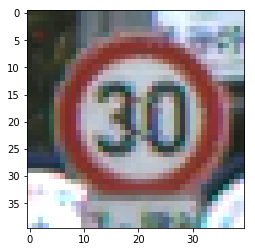

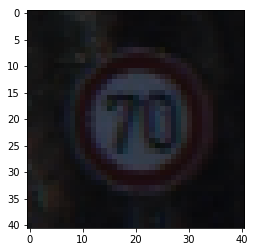

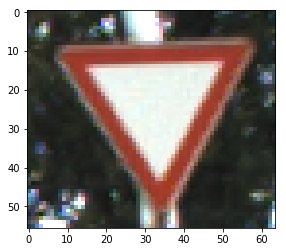

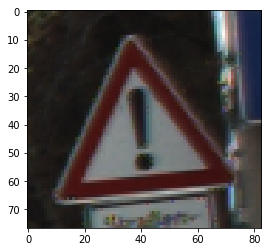

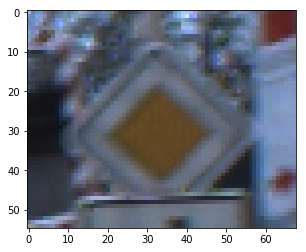

In [40]:
# We are going to show the images with the following code.
images = []
for item in file_images:
    img = imread(item)
    images.append(img)
    plt.imshow(img) 
    plt.show()
    
    

In [44]:
# We print the dimensions of one the images.
print(images[0].shape)

(40, 40, 3)


Due to the size of the images is not 32x32, we need to resize the images, so the following function is going to be used: 

In [45]:
from PIL import Image

# This code was obtained from the following website:
# https://www.blog.pythonlibrary.org/2017/10/12/how-to-resize-a-photo-with-python/
 
def resize_image(input_image_path,
                 output_image_path,
                 size):
    original_image = Image.open(input_image_path)
    width, height = original_image.size
    print('The original image size is {wide} wide x {height} '
          'high'.format(wide=width, height=height))
 
    resized_image = original_image.resize(size)
    width, height = resized_image.size
    print('The resized image size is {wide} wide x {height} '
          'high'.format(wide=width, height=height))
    resized_image.show()
    resized_image.save(output_image_path)

In [48]:
# We create a list containing the relative path of the files with the images resized.
file_images_modified = []
for item in sample_images:
    file_images_modified.append('./new_images/' + '{:>05d}'.format(item) + '_resized' + '.ppm')

In [54]:
# With the following code we are going to generate the image files with a size of 32x32 pixels.
image_size = 32, 32
for idx, val in enumerate(file_images):
    resize_image(file_images[idx], file_images_modified[idx],image_size)
    

The original image size is 40 wide x 40 high
The resized image size is 32 wide x 32 high
The original image size is 41 wide x 41 high
The resized image size is 32 wide x 32 high
The original image size is 64 wide x 56 high
The resized image size is 32 wide x 32 high
The original image size is 83 wide x 77 high
The resized image size is 32 wide x 32 high
The original image size is 68 wide x 55 high
The resized image size is 32 wide x 32 high


We are going to convert the images to a grayscale.

In [55]:
# We load the images resized into a Python list.
images_modified = []
for item in file_images_modified:
    img = imread(item)
    images_modified.append(img)


In [56]:
print(images_modified[0].shape)

(32, 32, 3)


In [57]:
images_modified = np.array(images_modified)
print(images_modified.shape)

(5, 32, 32, 3)


In [58]:
images_modified = rgb2gray(images_modified)
images_modified = normalize(images_modified)

### Predict the Sign Type for Each Image

In [59]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.


### Feel free to use as many code cells as needed.

In [61]:
images_modified[0,:,:]

array([[-0.61267187, -0.60341406, -0.63432813, ...,  0.71909375,
         0.71803906,  0.70546875],
       [-0.49849219, -0.54133594, -0.623375  , ...,  0.73280469,
         0.71417187,  0.71116406],
       [-0.639     , -0.64744531, -0.67110156, ...,  0.27549219,
        -0.06877344,  0.47576562],
       ..., 
       [ 0.9921875 ,  0.9921875 ,  0.9921875 , ...,  0.93715625,
         0.73252344,  0.78729688],
       [ 0.98301562,  0.96649219,  0.96415625, ...,  0.66565625,
         0.90148437,  0.9921875 ],
       [ 0.87200781,  0.57367969,  0.53465625, ...,  0.50766406,
         0.9921875 ,  0.9921875 ]])

In [71]:
# the numpy array images_modified has a shape of 5, 32, 32 that is why 
# we need to add an extra dimensions (the color channel). 
images_modified = images_modified[:,:,:,np.newaxis]


In [72]:
print(images_modified.shape)

(5, 32, 32, 1)


In [78]:
# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
keep_prob = tf.placeholder(tf.float32, name="keep_prob")
logits = LeNet2(x, keep_prob)
prediction = tf.argmax(logits, 1)
saver = tf.train.Saver()


def pred(X_data):
    sess = tf.get_default_session()
    pred = sess.run(prediction, feed_dict={x: X_data, keep_prob:1.0})
    
    return pred

In [80]:
with tf.Session() as sess:
    saver.restore(sess, "./lenet_dropout3")
    predict = pred(images_modified)
    print(predict)

[ 1  4 13 18 12]


The model has forecast the following labels: 1, 4, 13, 18, and 12 in the previous images. We are going to analyze the performance of these predictions.

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

We are going to calculate the accuracy with the following code: 

In [88]:
(predict == sample_labels).sum() / len(predict)

1.0

The model has forecast correctly each of the five pictures considered. 

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

In [94]:
# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
keep_prob = tf.placeholder(tf.float32, name="keep_prob")
logits = LeNet2(x, keep_prob)
prediction = tf.nn.top_k(tf.nn.softmax(logits), 5)
saver = tf.train.Saver()


def pred_topk(X_data):
    sess = tf.get_default_session()
    pred = sess.run(prediction, feed_dict={x: X_data, keep_prob:1.0})        
    return pred

In [95]:
with tf.Session() as sess:
    saver.restore(sess, "./lenet_dropout3")
    predict_topk = pred(images_modified)
    print(predict_topk)

TopKV2(values=array([[  9.99446690e-01,   4.94337175e-04,   3.84170671e-05,
          2.05533906e-05,   5.61166331e-08],
       [  9.63142693e-01,   2.17354931e-02,   9.65417735e-03,
          5.35637327e-03,   4.99302623e-05],
       [  1.00000000e+00,   1.24625038e-21,   2.98008868e-23,
          4.12624183e-28,   7.38018582e-29],
       [  9.51410234e-01,   4.79275174e-02,   6.56011689e-04,
          6.07826451e-06,   1.47831400e-07],
       [  9.93026018e-01,   2.80808611e-03,   1.72838150e-03,
          6.55918906e-04,   6.21806248e-04]], dtype=float32), indices=array([[ 1,  0,  2,  4,  8],
       [ 4,  8,  1,  2,  5],
       [13, 15,  3,  5, 35],
       [18, 26, 24, 27, 20],
       [12, 40, 32, 38, 41]], dtype=int32))


The model has predicted with great certain the five pictures since that the predictions are above 95%, which you can see in the following table. 

| Picture     | Predicted label | Probability    |
|-------------|-----------------|----------------|
| 12055.ppm   |      1          | 0.99944669     |
| 09594.ppm   |      4          | 0.963142693    |
| 07138.ppm   |      13         | 1.0            |
| 00136.ppm   |      18         | 0.951410234    |
| 07376.ppm   |      12         | 0.993026018    |

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")